# Problem Statement

#### Context
**Economies are better when logistics is efficient and affordable**

Sendy, in partnership with insight to impact facility, is hosting a Zindi challenge to predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. 
Sendy helps men and women behind every type of business to trade easily, deliver more competitively, and build extraordinary business.

#### Why Solve this problem?
The solution will help Sendy enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

An accurate arrival time prediction will help all businesses to improve their logistics and communicate an accurate time to their customers. 

#### What will be done?
Given the details of a Sendy order, historic data will be used to predict the time of arrival of a rider at the destination of a package as accurately as possible.

#### How will this be done

By building a linear regression model that predicts an accurate delivery time, from picking up a package to arriving at the final destination.


# 1. Data Pre-Processing

## 1.1 Load Libraries

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

## 1.2 Check Datasets

#### Check that all datasets are accounted for

The files for download according to the hackathon:

* `Train.csv` - is the dataset that you will use to train your model
* `Test.csv` - is the dataset on which you will apply your model to.
* `Riders.csv` - contains unique rider Ids, number of orders, age, rating and number of ratings
* `VariableDefinitions.csv` - Definitions of variables in the Train, Test and Riders files

The above files are accounted for.

An additional file, `SampleSubmission.csv` was available for download as well

## 1.3 Import the datasets

In [2]:
# import Datasets

train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
riders_df = pd.read_csv('Riders.csv')
variable_definitions_df = pd.read_csv('VariableDefinitions.csv', header=None,
                                      names=['Variable', 'Definition'])
sample_submission_df = pd.read_csv('SampleSubmission.csv')

In [3]:
# check training data
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
# check test data
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [5]:
# check riders
riders_df.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [6]:
# Check variable definitions
variable_definitions_df.head()

,Variable,Definition
0,Order No,Unique number identifying the order
1,User Id,Unique number identifying the customer on a pl...
2,Vehicle Type,"For this competition limited to bikes, however..."
3,Platform Type,"Platform used to place the order, there are 4 ..."
4,Personal or Business,Customer type


In [7]:
# check sample submission
sample_submission_df.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


#### Prelimenary observation
Based on DataFrame previews it can be assumed that of all data were successfully imported. the following data will form part of the regression analysis:
* `train_df`
* `test_df`
* `riders_df`

`variable_definitions_df` privides definitions of the variables

`sample_submission_df` is a template for the submission of model predictions for this project

## 1.4 Assess Data

### 1.4.1 Assess variable definitions

In [8]:
#Merge both train and test datasets with raider dataset
merged_train_rider = pd.merge(train_df, riders_df, on='Rider Id')
merged_test_rider = pd.merge(test_df, riders_df, on='Rider Id')

In [9]:
#Get the data types of the variables
merged_train_rider_cols = pd.DataFrame(merged_train_rider.dtypes, columns=['Dtype'])
merged_train_rider_cols.index = merged_train_rider_cols.index.rename(name='Variable')
Variables_Table = pd.merge(variable_definitions_df, merged_train_rider_cols, on='Variable')
Variables_Table.head()

,Variable,Definition,Dtype
0,Order No,Unique number identifying the order,object
1,User Id,Unique number identifying the customer on a pl...,object
2,Vehicle Type,"For this competition limited to bikes, however...",object
3,Platform Type,"Platform used to place the order, there are 4 ...",int64
4,Personal or Business,Customer type,object


In [10]:
# Get variable definitions
print(f'Number of variables: {len(Variables_Table)}\n',
     '======================================= \n')
for var, definition, datatype in Variables_Table.values:
    print(f'{var}\ndata type:{datatype}\nDef:{definition}\n')

Number of variables: 34

Order No
data type:object
Def:Unique number identifying the order

User Id
data type:object
Def:Unique number identifying the customer on a platform

Vehicle Type
data type:object
Def:For this competition limited to bikes, however in practice Sendy service extends to trucks and vans

Platform Type
data type:int64
Def:Platform used to place the order, there are 4 types

Personal or Business
data type:object
Def:Customer type

Placement - Day of Month
data type:int64
Def:Placement - Day of Month i.e 1-31

Placement - Weekday (Mo = 1)
data type:int64
Def:Placement - Weekday (Monday = 1)

Placement - Time
data type:object
Def:Placement - Time - Time of day the order was placed

Confirmation - Day of Month
data type:int64
Def:Confirmation - Day of Month i.e 1-31

Confirmation - Weekday (Mo = 1)
data type:int64
Def:Confirmation - Weekday (Monday = 1)

Confirmation - Time
data type:object
Def:Confirmation - Time - Time of day the order was confirmed by a rider

Arriva

#### Conclusion from Definitions
* Per definition, the platform type should be non-numerical
* Per definition, All Days should be non-numerical
    * Weekday
    * Day of Month

### 1.4.2 Change Variable Types

In [11]:
# create copy of dataframes to change variable types
merged_train_rider_dtype = merged_train_rider.copy()
merged_test_rider_dtype = merged_test_rider.copy()

In [12]:
# list of variables to make non-numeric
non_num_list_train = ['Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
                'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
                'Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)',
                'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
                'Arrival at Destination - Day of Month',
                'Arrival at Destination - Weekday (Mo = 1)', 'Platform Type']

non_num_list_test = ['Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
                'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
                'Arrival at Pickup - Weekday (Mo = 1)',
                'Pickup - Weekday (Mo = 1)', 'Platform Type']

In [13]:
for col in non_num_list_train:
    merged_train_rider_dtype[col] = merged_train_rider_dtype[col].astype('object')

In [14]:
for col in non_num_list_test:
    merged_test_rider_dtype[col] = merged_test_rider_dtype[col].astype('object')

In [15]:
#Create a table of changed variables
merged_train_rider_cols2 = pd.DataFrame(merged_train_rider_dtype.dtypes, columns=['Dtype'])
merged_train_rider_cols2.index = merged_train_rider_cols2.index.rename(name='Variable')
Variables_Table2 = pd.merge(variable_definitions_df, merged_train_rider_cols2, on='Variable')
Variables_Table2.head()

,Variable,Definition,Dtype
0,Order No,Unique number identifying the order,object
1,User Id,Unique number identifying the customer on a pl...,object
2,Vehicle Type,"For this competition limited to bikes, however...",object
3,Platform Type,"Platform used to place the order, there are 4 ...",object
4,Personal or Business,Customer type,object


In [16]:
# Get variable datatypes
print(f'Number of variables: {len(Variables_Table2)}\n',
     '======================================= \n')
for var, definition, datatype in Variables_Table2.values:
    print(f'{var}\ndata type:{datatype}\nDef:{definition}\n')

Number of variables: 34

Order No
data type:object
Def:Unique number identifying the order

User Id
data type:object
Def:Unique number identifying the customer on a platform

Vehicle Type
data type:object
Def:For this competition limited to bikes, however in practice Sendy service extends to trucks and vans

Platform Type
data type:object
Def:Platform used to place the order, there are 4 types

Personal or Business
data type:object
Def:Customer type

Placement - Day of Month
data type:object
Def:Placement - Day of Month i.e 1-31

Placement - Weekday (Mo = 1)
data type:object
Def:Placement - Weekday (Monday = 1)

Placement - Time
data type:object
Def:Placement - Time - Time of day the order was placed

Confirmation - Day of Month
data type:object
Def:Confirmation - Day of Month i.e 1-31

Confirmation - Weekday (Mo = 1)
data type:object
Def:Confirmation - Weekday (Monday = 1)

Confirmation - Time
data type:object
Def:Confirmation - Time - Time of day the order was confirmed by a rider

A

### 1.4.3 Assess Missing Data

In [17]:
# define function to calculate missing values
def missing_values_table(df):
    """
    This function takes a dataframe as input and returns a dataframe
    of the number and percentage of missing values as an output.
    
    Args:
        df(DataFrame): input as either train dataset or test dataset
        
    return: 
            DataFrame: number and percentage of missing values 
    """
    # list of NaN values
    mis_val = df.isnull().sum()
    
    #Calculating the percentage
    mis_val_percent = 100 * df.isnull().sum() / len(df) 
    
    # Concatenate both mis_value and mis_val_percent
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) 
    
    #Rename both mis_val and mis_val_percent
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    #Change to Descending order and round-off to 1 decimal
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [18]:
# Assess Train dataset dimensions, variables and datatypes
merged_train_rider_dtype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null object
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null object
Placement - Weekday (Mo = 1)                 21201 non-null object
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null object
Confirmation - Weekday (Mo = 1)              21201 non-null object
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null object
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null object
Arrival at Pickup - 

In [19]:
# Assess Train dataset missing values
missing_values_table(merged_train_rider_dtype)

Your selected dataframe has 33 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Precipitation in millimeters,20649,97.4
Temperature,4366,20.6


In [20]:
# Assess Test dataset dimensions, variables and datatypes
merged_test_rider_dtype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 29 columns):
Order No                                7068 non-null object
User Id                                 7068 non-null object
Vehicle Type                            7068 non-null object
Platform Type                           7068 non-null object
Personal or Business                    7068 non-null object
Placement - Day of Month                7068 non-null object
Placement - Weekday (Mo = 1)            7068 non-null object
Placement - Time                        7068 non-null object
Confirmation - Day of Month             7068 non-null object
Confirmation - Weekday (Mo = 1)         7068 non-null object
Confirmation - Time                     7068 non-null object
Arrival at Pickup - Day of Month        7068 non-null int64
Arrival at Pickup - Weekday (Mo = 1)    7068 non-null object
Arrival at Pickup - Time                7068 non-null object
Pickup - Day of Month                   

In [21]:
# Assess Test dataset missing values
missing_values_table(merged_test_rider_dtype)

Your selected dataframe has 29 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Precipitation in millimeters,6869,97.2
Temperature,1437,20.3


### 1.4.4 EDA

In [22]:
# list of numeric data types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features = merged_train_rider_dtype.select_dtypes(include=numerics).columns
print(f'Numeric features: {len(numeric_features)} features\n{numeric_features}')

# list of columns for non-numeric features
non_numeric_features = merged_train_rider_dtype.select_dtypes(include='object').columns
print(f'Non-numeric features: {len(non_numeric_features)} features\n{non_numeric_features}')

Numeric features: 12 features
Index(['Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')
Non-numeric features: 21 features
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Rider Id'],
      dtype='object')


count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64
Skewness: 1.201938
Kurtosis: 2.236352


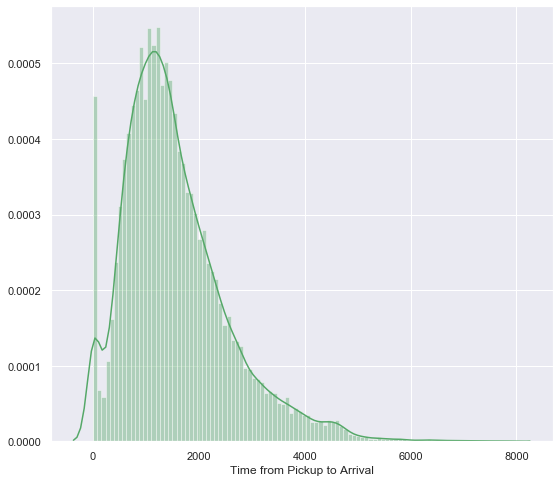

In [23]:
# Assess response variable
print(merged_train_rider_dtype['Time from Pickup to Arrival'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(merged_train_rider_dtype['Time from Pickup to Arrival'], color='g', bins=100, hist_kws={'alpha': 0.4});
#skewness and kurtosis
print("Skewness: %f" % merged_train_rider_dtype['Time from Pickup to Arrival'].skew())
print("Kurtosis: %f" % merged_train_rider_dtype['Time from Pickup to Arrival'].kurt())

#### Obervations
* Exponential distribution
* Large Number of 0 second Time from pickup to arrival

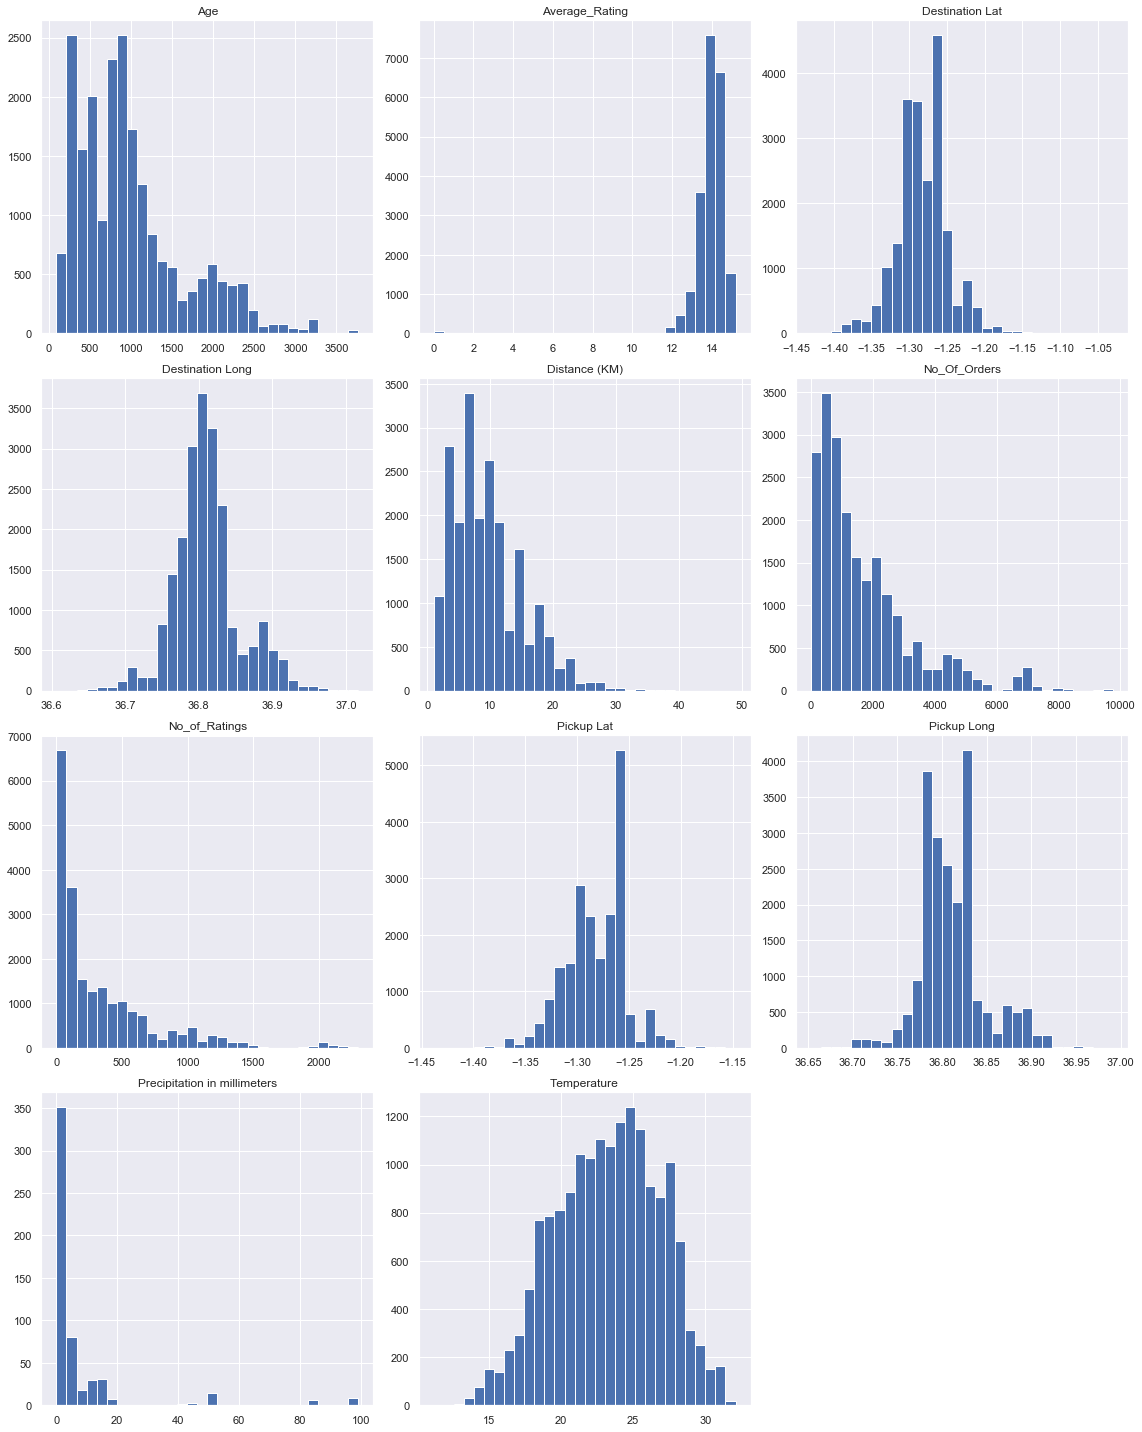

In [24]:
# Assess numercal predictor variables
merged_train_rider_dtype.drop(['Time from Pickup to Arrival'], axis=1).hist(
    figsize=(16, 20),bins=30)
plt.tight_layout()
plt.show()

Features such as `Age `and `Distance(KM)`. Seems to share a similar distribution to the one we have with `Time from Pickup to Arrival`. Lets see if we can find new clues later.

In [25]:
# Create correlation matrix
corr = merged_train_rider_dtype.drop('Time from Pickup to Arrival', axis=1).corr()

In [26]:
# import function to plot correlation matrix
from statsmodels.graphics.correlation import plot_corr

<Figure size 720x504 with 0 Axes>

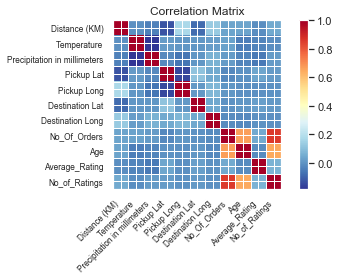

In [27]:
# Plot the correlation
plt.figure(figsize=(10,7))
fig=plot_corr(corr,xnames=corr.columns)
plt.show()

#### Observations
highly correlated variables:
* Number of orders
* Age
* No of Ratings


In [28]:
# Calculate the correlations between predictor variables and the response variable
corrs = merged_train_rider_dtype.corr()['Time from Pickup to Arrival'].sort_values(ascending=False)
print(f'correlations with {merged_train_rider_dtype.columns[-1]}:\n{corrs}')

correlations with No_of_Ratings:
Time from Pickup to Arrival     1.000000
Distance (KM)                   0.580608
Destination Long                0.070425
Pickup Long                     0.060285
Precipitation in millimeters    0.024756
Temperature                     0.006465
No_of_Ratings                   0.005609
Age                            -0.007969
No_Of_Orders                   -0.041608
Average_Rating                 -0.042559
Pickup Lat                     -0.053823
Destination Lat                -0.061872
Name: Time from Pickup to Arrival, dtype: float64


In [29]:
# Check the most frequently occurring value of 'Order No'
plot_var = 'Order No'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

Order_No_8448     0.000047
Order_No_22734    0.000047
Order_No_25055    0.000047
Order_No_3663     0.000047
Order_No_1129     0.000047
                    ...   
Order_No_10894    0.000047
Order_No_28022    0.000047
Order_No_961      0.000047
Order_No_6805     0.000047
Order_No_8968     0.000047
Name: Order No, Length: 21201, dtype: float64

In [30]:
# Check the most frequently occurring value of 'User Id'
plot_var = 'User Id'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

User_Id_393     0.030423
User_Id_2330    0.015188
User_Id_3647    0.014716
User_Id_1500    0.014197
User_Id_635     0.013679
                  ...   
User_Id_3708    0.000047
User_Id_233     0.000047
User_Id_3415    0.000047
User_Id_3722    0.000047
User_Id_1590    0.000047
Name: User Id, Length: 3186, dtype: float64

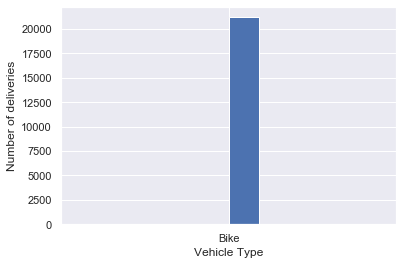

Bike    1.0
Name: Vehicle Type, dtype: float64

In [31]:
# Plot histogram of 'Vehicle Type'
plot_var = 'Vehicle Type'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Vehicle Type'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

 * Vehicle Type is only Bike, the plot is not going to which one is higher than the other. Which it's not giving us any clue to predict the model.

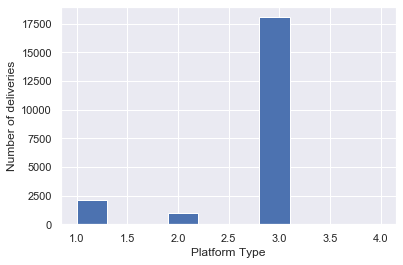

3    0.851564
1    0.101269
2    0.046224
4    0.000943
Name: Platform Type, dtype: float64

In [32]:
# Plot histogram of 'Platform Type'
plot_var = 'Platform Type'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Platform Type'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

* `Platform Type` feature may not be relevant for predictive model. Since x ~ 4 is very low in percentage.

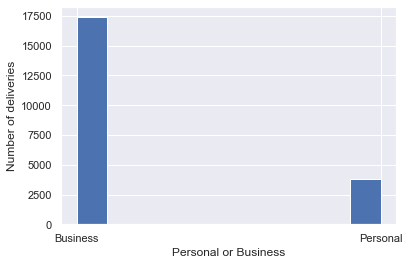

Business    0.819961
Personal    0.180039
Name: Personal or Business, dtype: float64

In [33]:
# Plot histogram of 'Personal or Business'
plot_var = 'Personal or Business'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Personal or Business'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

* We have discovered that a categorical variable: `Personal or Business`, seems to be more relevant in terms of training the model and predict.

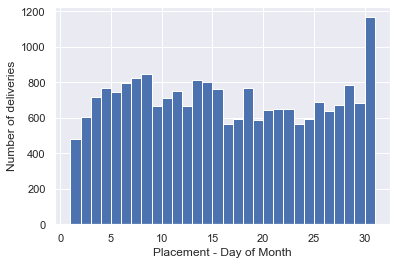

8     0.039998
7     0.038772
13    0.038253
14    0.037923
6     0.037451
28    0.036979
18    0.036272
4     0.036272
15    0.035942
11    0.035470
5     0.035234
3     0.033866
30    0.033678
10    0.033442
25    0.032593
29    0.032310
27    0.031602
9     0.031461
12    0.031414
22    0.030659
21    0.030612
20    0.030329
26    0.030140
2     0.028395
17    0.027970
24    0.027876
19    0.027782
16    0.026650
23    0.026555
1     0.022735
31    0.021367
Name: Placement - Day of Month, dtype: float64

In [34]:
# Plot histogram of 'Placement - Day of Month'
plot_var = 'Placement - Day of Month'
plt.hist(merged_train_rider_dtype[plot_var], bins=30)
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Placement - Day of Month'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

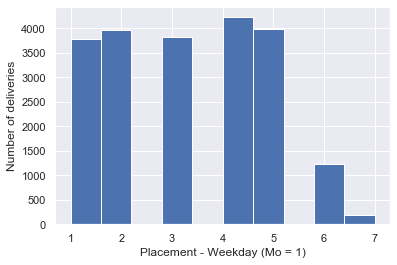

4    0.199425
5    0.188340
2    0.186736
3    0.180322
1    0.178718
6    0.057686
7    0.008773
Name: Placement - Weekday (Mo = 1), dtype: float64

In [35]:
# Plot histogram of 'Placement - Weekday (Mo = 1)'
plot_var = 'Placement - Weekday (Mo = 1)'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Placement - Weekday (Mo = 1)'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

In [36]:
# Check the most frequently occurring value of 'Placement - Time'
plot_var = 'Placement - Time'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

12:51:03 PM    0.000283
9:41:03 AM     0.000283
10:31:43 AM    0.000283
2:06:19 PM     0.000283
2:57:22 PM     0.000283
                 ...   
12:38:47 PM    0.000047
4:00:56 PM     0.000047
12:34:01 PM    0.000047
3:49:32 PM     0.000047
9:25:31 AM     0.000047
Name: Placement - Time, Length: 15686, dtype: float64

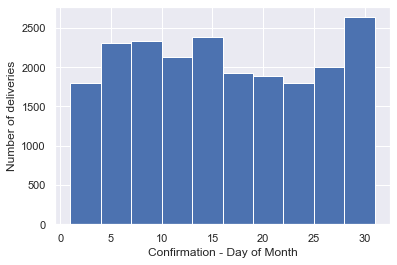

8     0.039998
7     0.038772
13    0.038300
14    0.037923
6     0.037451
28    0.036979
18    0.036319
4     0.036272
15    0.035942
11    0.035423
5     0.035234
3     0.033866
30    0.033678
10    0.033442
25    0.032593
29    0.032310
27    0.031602
9     0.031461
12    0.031414
22    0.030659
21    0.030612
20    0.030329
26    0.030140
2     0.028395
17    0.027923
24    0.027876
19    0.027782
16    0.026650
23    0.026555
1     0.022735
31    0.021367
Name: Confirmation - Day of Month, dtype: float64

In [37]:
# Plot histogram of 'Confirmation - Day of Month'
plot_var = 'Confirmation - Day of Month'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Confirmation - Day of Month'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

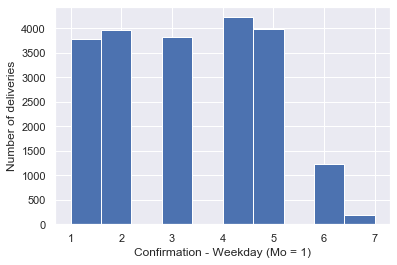

4    0.199472
5    0.188340
2    0.186736
3    0.180322
1    0.178671
6    0.057686
7    0.008773
Name: Confirmation - Weekday (Mo = 1), dtype: float64

In [38]:
# Plot histogram of 'Confirmation - Weekday (Mo = 1)'
plot_var = 'Confirmation - Weekday (Mo = 1)'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Confirmation - Weekday (Mo = 1)'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

In [39]:
# Check the most frequently occurring value of 'Confirmation - Time'
plot_var = 'Confirmation - Time'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

9:56:52 AM     0.000283
11:14:38 AM    0.000236
3:48:00 PM     0.000236
2:28:37 PM     0.000236
4:06:12 PM     0.000236
                 ...   
12:09:04 PM    0.000047
10:28:05 AM    0.000047
2:47:01 PM     0.000047
3:46:48 PM     0.000047
12:10:39 PM    0.000047
Name: Confirmation - Time, Length: 15742, dtype: float64

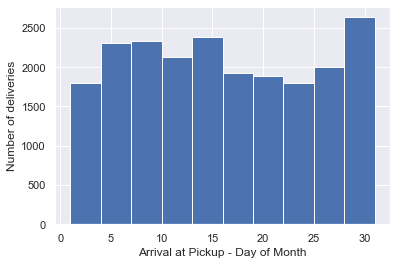

8     0.039998
7     0.038772
13    0.038300
14    0.037923
6     0.037451
28    0.036979
18    0.036319
4     0.036272
15    0.035942
11    0.035423
5     0.035234
3     0.033866
30    0.033678
10    0.033442
25    0.032593
29    0.032310
27    0.031602
9     0.031461
12    0.031414
22    0.030659
21    0.030612
20    0.030329
26    0.030140
2     0.028395
17    0.027923
24    0.027876
19    0.027782
16    0.026650
23    0.026555
1     0.022735
31    0.021367
Name: Arrival at Pickup - Day of Month, dtype: float64

In [40]:
# Plot histogram of 'Arrival at Pickup - Day of Month'
plot_var = 'Arrival at Pickup - Day of Month'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Arrival at Pickup - Day of Month'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

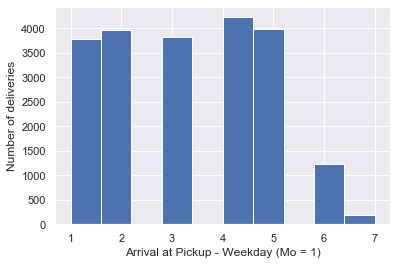

4    0.199472
5    0.188340
2    0.186736
3    0.180322
1    0.178671
6    0.057686
7    0.008773
Name: Arrival at Pickup - Weekday (Mo = 1), dtype: float64

In [41]:
# Plot histogram of 'Arrival at Pickup - Weekday (Mo = 1)'
plot_var = 'Arrival at Pickup - Weekday (Mo = 1)'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Arrival at Pickup - Weekday (Mo = 1)'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

In [42]:
# Check the most frequently occurring value of 'Arrival at Pickup - Time'
plot_var = 'Arrival at Pickup - Time'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

3:02:41 PM     0.000283
1:02:53 PM     0.000283
2:10:11 PM     0.000283
2:32:04 PM     0.000283
2:42:41 PM     0.000283
                 ...   
4:25:00 PM     0.000047
10:42:48 AM    0.000047
9:55:58 AM     0.000047
7:09:47 PM     0.000047
2:58:38 PM     0.000047
Name: Arrival at Pickup - Time, Length: 15767, dtype: float64

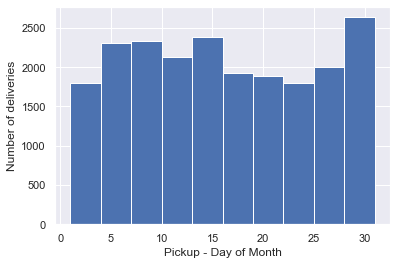

8     0.039998
7     0.038772
13    0.038300
14    0.037923
6     0.037451
28    0.036979
18    0.036319
4     0.036272
15    0.035942
11    0.035423
5     0.035234
3     0.033866
30    0.033678
10    0.033442
25    0.032593
29    0.032310
27    0.031602
9     0.031461
12    0.031414
22    0.030659
21    0.030612
20    0.030329
26    0.030140
2     0.028395
17    0.027923
24    0.027876
19    0.027782
16    0.026650
23    0.026555
1     0.022735
31    0.021367
Name: Pickup - Day of Month, dtype: float64

In [43]:
# Plot histogram of 'Pickup - Day of Month'
plot_var = 'Pickup - Day of Month'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Pickup - Day of Month'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

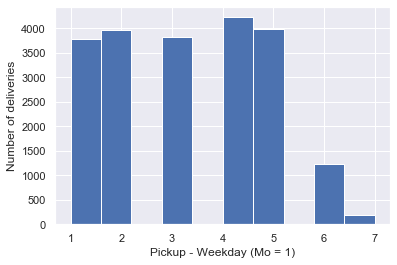

4    0.199472
5    0.188340
2    0.186736
3    0.180322
1    0.178671
6    0.057686
7    0.008773
Name: Pickup - Weekday (Mo = 1), dtype: float64

In [44]:
# Plot histogram of 'Pickup - Weekday (Mo = 1)'
plot_var = 'Pickup - Weekday (Mo = 1)'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Pickup - Weekday (Mo = 1)'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

In [45]:
# Check the most frequently occurring value of 'Pickup - Time'
plot_var = 'Pickup - Time'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

12:04:20 PM    0.000283
11:19:28 AM    0.000283
10:53:20 AM    0.000283
2:28:10 PM     0.000283
3:22:34 PM     0.000236
                 ...   
6:29:37 PM     0.000047
3:22:17 PM     0.000047
5:02:09 PM     0.000047
4:24:46 PM     0.000047
10:22:27 AM    0.000047
Name: Pickup - Time, Length: 15690, dtype: float64

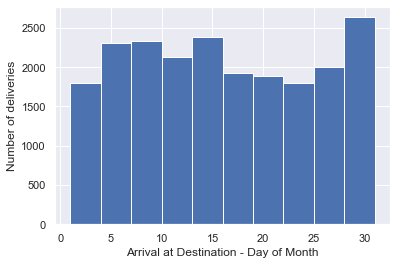

8     0.039998
7     0.038772
13    0.038300
14    0.037923
6     0.037451
28    0.036979
18    0.036319
4     0.036272
15    0.035942
11    0.035423
5     0.035234
3     0.033866
30    0.033678
10    0.033442
25    0.032593
29    0.032310
27    0.031602
9     0.031461
12    0.031414
22    0.030659
21    0.030612
20    0.030329
26    0.030140
2     0.028395
17    0.027923
24    0.027876
19    0.027782
16    0.026650
23    0.026555
1     0.022735
31    0.021367
Name: Arrival at Destination - Day of Month, dtype: float64

In [46]:
# Plot histogram of 'Arrival at Destination - Day of Month'
plot_var = 'Arrival at Destination - Day of Month'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Arrival at Destination - Day of Month'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

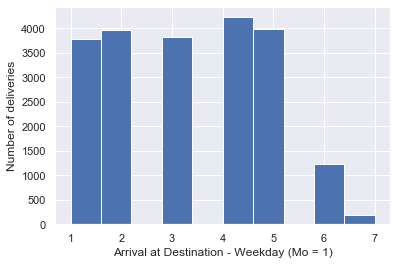

4    0.199472
5    0.188340
2    0.186736
3    0.180322
1    0.178671
6    0.057686
7    0.008773
Name: Arrival at Destination - Weekday (Mo = 1), dtype: float64

In [47]:
# Plot histogram of 'Arrival at Destination - Weekday (Mo = 1)'
plot_var = 'Arrival at Destination - Weekday (Mo = 1)'
plt.hist(merged_train_rider_dtype[plot_var])
plt.xlabel(plot_var)
plt.ylabel('Number of deliveries')
plt.show()

# Check the most frequently occurring value of 'Arrival at Destination - Weekday (Mo = 1)'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

In [48]:
# Check the most frequently occurring value of 'Arrival at Destination - Time'
plot_var = 'Arrival at Destination - Time'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

3:24:03 PM     0.000330
11:16:33 AM    0.000283
1:25:43 PM     0.000283
1:08:03 PM     0.000283
1:50:29 PM     0.000236
                 ...   
1:19:25 PM     0.000047
2:02:47 PM     0.000047
5:19:33 PM     0.000047
11:18:39 AM    0.000047
11:06:16 AM    0.000047
Name: Arrival at Destination - Time, Length: 15725, dtype: float64

In [49]:
# Check the most frequently occurring value of 'Rider Id'
plot_var = 'Rider Id'
merged_train_rider_dtype[plot_var].value_counts(normalize=True)

Rider_Id_726    0.011650
Rider_Id_576    0.010518
Rider_Id_523    0.009386
Rider_Id_101    0.008632
Rider_Id_205    0.008585
                  ...   
Rider_Id_305    0.000047
Rider_Id_602    0.000047
Rider_Id_115    0.000047
Rider_Id_201    0.000047
Rider_Id_180    0.000047
Name: Rider Id, Length: 924, dtype: float64

### 1.4.5 Assessing Time

In [50]:
# Function to convert the date format 
def convert12_to_24(time):
    
    """convert12_to_24 function input a time as a string and remove 'AM' or 'PM' string at the end-string of a 
       time. Then return the conversion from 12 hours to 24 hours as a string.
       
       Arg: 
           time(string): a string of time in 12 hours
           
       return:
              string: converted time in 24 hours with 'AM' or 'PM'
    """
      
    # Checking if last two elements of time 
    # is AM and first two elements are 12 
    if time[-2:] == "AM" and time[:2] == "12": 
        return "00" + time[2:-2] 
          
    # remove the AM     
    elif time[-2:] == "AM": 
        return time[:-2] 
      
    # Checking if last two elements of time 
    # is PM and first two elements are 12    
    elif time[-2:] == "PM" and time[:2] == "12": 
        return time[:-2] 
    
    # add 12 to hours and remove PM     
    elif time[:2] == time[:1] + ':':
        return str(int(time[:1]) + 12) + time[1:8] 
    else:      
         return str(int(time[:2]) + 12) + time[2:8]

In [51]:
def get_hour(time):
    
    # convert to 24 hour time
    time_24 = convert12_to_24(time)
    
    # extract hour
    return int(time_24[:time_24.find(':')])

In [52]:
# Load time data of train
train_time_df = train_df.filter(regex='Time').drop(['Time from Pickup to Arrival'],axis=1)
train_time_df.head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
0,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,10:39:55 AM
1,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM,12:17:22 PM
2,12:39:25 PM,12:42:44 PM,12:49:34 PM,12:53:03 PM,1:00:38 PM
3,9:25:34 AM,9:26:05 AM,9:37:56 AM,9:43:06 AM,10:05:27 AM
4,9:55:18 AM,9:56:18 AM,10:03:53 AM,10:05:23 AM,10:25:37 AM


In [53]:
# Load time data of test
test_time_df = test_df.filter(regex='Time')
test_time_df.head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time
0,4:44:10 PM,4:44:29 PM,4:53:04 PM,5:06:47 PM
1,12:57:35 PM,12:59:17 PM,1:20:27 PM,1:25:37 PM
2,11:08:14 AM,11:25:05 AM,11:33:20 AM,11:57:54 AM
3,1:51:35 PM,1:53:27 PM,2:02:41 PM,2:16:52 PM
4,11:30:28 AM,11:34:45 AM,11:47:19 AM,11:56:04 AM


In [54]:
# list test time in hours
for col in test_time_df.columns:
    str1 = 'Time'
    str2 = 'Hour'
    print(f'{col.replace(str1,str2)}')
    test_time_df[col.replace(str1,str2)] = test_time_df[col].apply(get_hour)

Placement - Hour
Confirmation - Hour
Arrival at Pickup - Hour
Pickup - Hour


C:\Users\Stanley Machuene\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [55]:
test_time_df.head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Placement - Hour,Confirmation - Hour,Arrival at Pickup - Hour,Pickup - Hour
0,4:44:10 PM,4:44:29 PM,4:53:04 PM,5:06:47 PM,16,16,16,17
1,12:57:35 PM,12:59:17 PM,1:20:27 PM,1:25:37 PM,12,12,13,13
2,11:08:14 AM,11:25:05 AM,11:33:20 AM,11:57:54 AM,11,11,11,11
3,1:51:35 PM,1:53:27 PM,2:02:41 PM,2:16:52 PM,13,13,14,14
4,11:30:28 AM,11:34:45 AM,11:47:19 AM,11:56:04 AM,11,11,11,11


In [56]:
# list train time in hours
for col in train_time_df.columns:
    str1 = 'Time'
    str2 = 'Hour'
    print(f'{col.replace(str1,str2)}')
    train_time_df[col.replace(str1,str2)] = train_time_df[col].apply(get_hour)

Placement - Hour
Confirmation - Hour
Arrival at Pickup - Hour
Pickup - Hour
Arrival at Destination - Hour


In [57]:
train_time_df.head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Placement - Hour,Confirmation - Hour,Arrival at Pickup - Hour,Pickup - Hour,Arrival at Destination - Hour
0,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,10:39:55 AM,9,9,10,10,10
1,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM,12:17:22 PM,11,11,11,11,12
2,12:39:25 PM,12:42:44 PM,12:49:34 PM,12:53:03 PM,1:00:38 PM,12,12,12,12,13
3,9:25:34 AM,9:26:05 AM,9:37:56 AM,9:43:06 AM,10:05:27 AM,9,9,9,9,10
4,9:55:18 AM,9:56:18 AM,10:03:53 AM,10:05:23 AM,10:25:37 AM,9,9,10,10,10


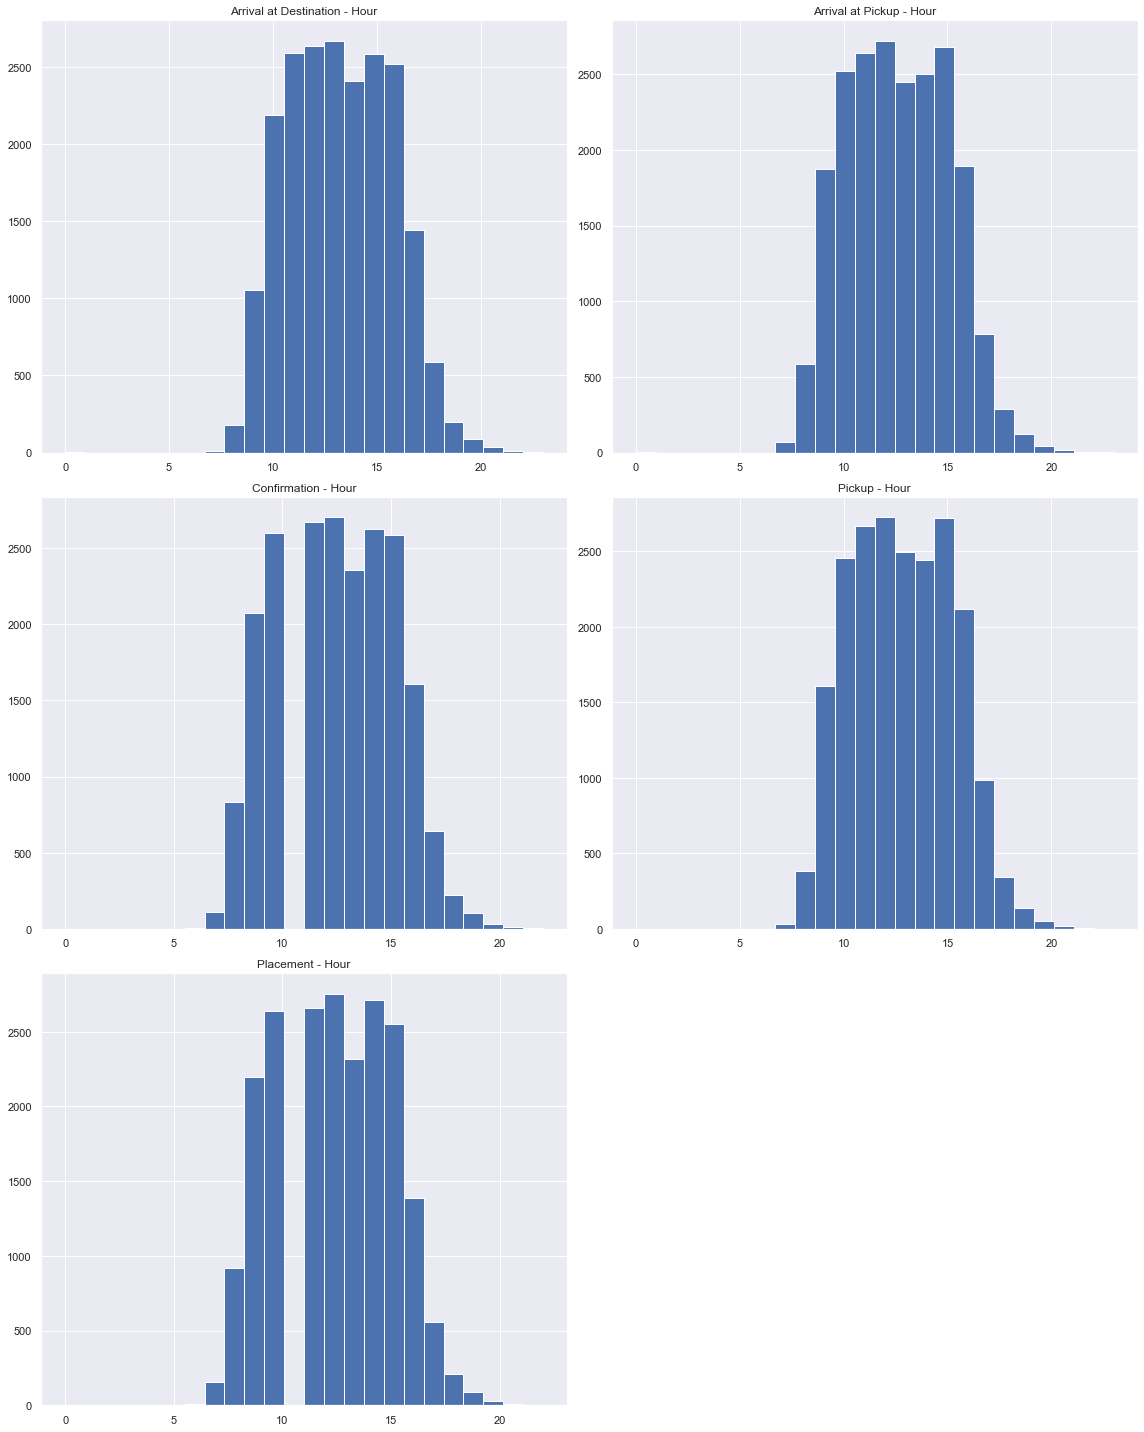

In [58]:
# Assess numercal predictor variables
train_time_df.hist(figsize=(16, 20), bins=24)

plt.tight_layout()
plt.show()

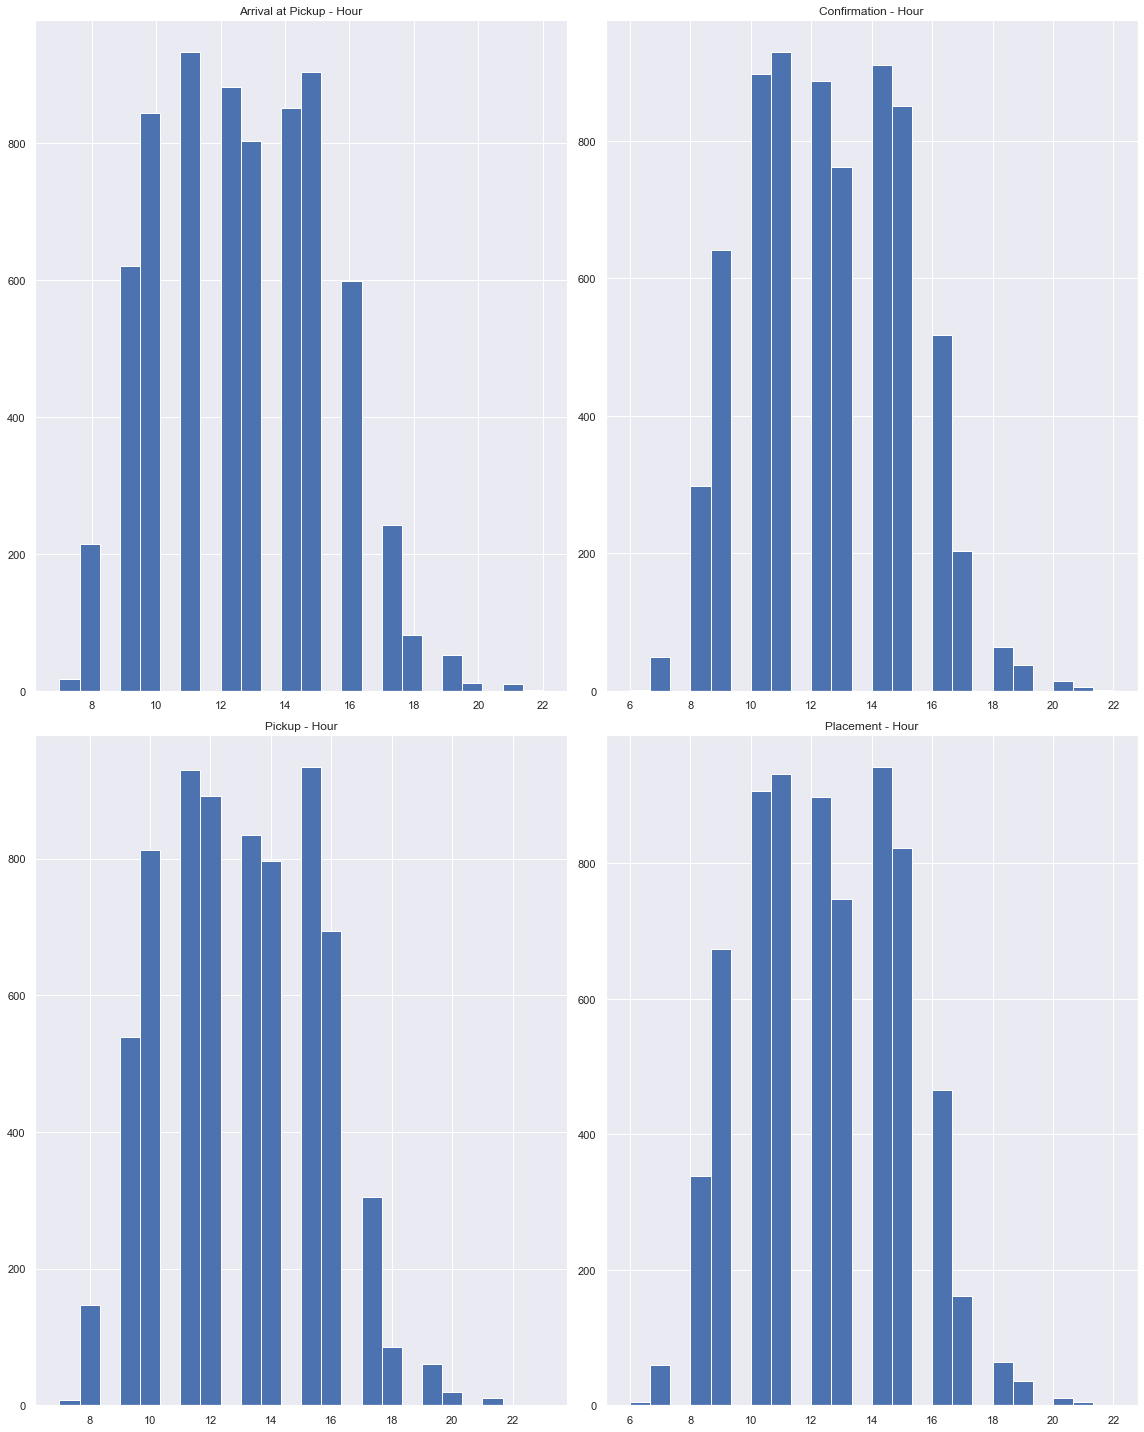

In [59]:
# Assess numercal predictor variables
test_time_df.hist(figsize=(16, 20), bins=24)

plt.tight_layout()
plt.show()

In [60]:
# Load train time data correlation
corr3 = train_time_df.corr()

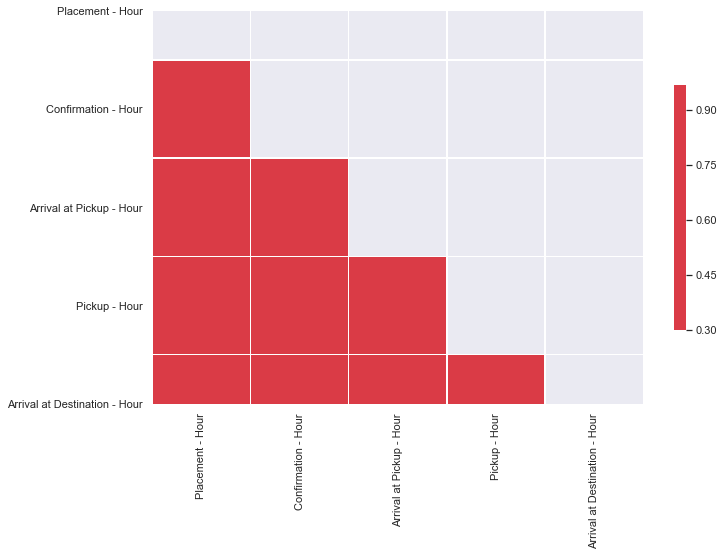

In [61]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr3, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr3, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The Hours relating to orders are highly correlated

# 2. Data Pre Processing

## 2.1 Variable Selection

#### Variables Dropped
* Rider data was not considered for the base model.
* Days of the week were strongly correlated therefore only of the `Confirmation - Day of Week` was kept as a predictor
* Days of the month were strongly correlated therefore only `Pickup - Day of Month` was kept as a predictor
* Lat and Long give coordinates of a place.
	* The coordinates serve to give distance between places.
	* Since we have Distance in KM the lat and long become reduntant.
* Precipitation has too many missing values
* Order number was dropped becase they are unique
* User ID was dropped because at around 7 orders per user, it was considered unique
* There was only 1 vehicle type therefore it was dropped
* Personal or Business because more than 81% of observations are business, therefore minimal variation.
* Although time would be a reasonable predictor to consider, in this occasion, it was not.

#### Predictor Variables
* `Distance (KM)`
* `Temperature`
* `Pickup - Day of Month`
* `Confirmation - Weekday (Mo = 1)`
* `Platform Type`

In [62]:
# create predictor vector
X = train_df[['Distance (KM)', 'Temperature', 'Pickup - Day of Month', 
             'Confirmation - Weekday (Mo = 1)', 'Platform Type']].values

# create our response variable
y = train_df['Time from Pickup to Arrival'].values

# create submission data variable
X_submission = test_df[['Distance (KM)', 'Temperature', 'Pickup - Day of Month', 
             'Confirmation - Weekday (Mo = 1)', 'Platform Type']].values

## 2.2 Test Train Split

In [63]:
# import train test split function
from sklearn.model_selection import train_test_split

In [64]:
# split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

## 2.3 Impute Missing Data

In [66]:
# import simple imputer class
from sklearn.impute import SimpleImputer

In [67]:
# instantiate an imputer object with a median filling strategy
imputer = SimpleImputer(missing_values = np.nan, strategy='median')

# apply filling
imputer.fit(X_train)

# Transform training data, testing data and submission data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
X_submission = imputer.transform(X_submission)

print (f'Train Data:\n{X_train}','\n')
print (f'Test Data:\n{X_test}','\n')
print (f'Submission Data:\n{X_submission}')

Train Data:
[[ 7.  24.  29.   2.   1. ]
 [ 7.  18.7  1.   6.   1. ]
 [20.  18.2  5.   3.   3. ]
 ...
 [10.  23.9 23.   5.   3. ]
 [14.  23.5 29.   5.   3. ]
 [ 4.  23.5 23.   6.   1. ]] 

Test Data:
[[15.  28.6  1.   5.   3. ]
 [ 4.  13.9 21.   6.   2. ]
 [10.  23.5 17.   5.   3. ]
 ...
 [ 8.  23.5  8.   3.   3. ]
 [ 8.  23.5 27.   6.   3. ]
 [ 9.  19.1 14.   4.   3. ]] 

Submission Data:
[[ 8.  23.5 27.   3.   3. ]
 [ 5.  23.5 17.   5.   3. ]
 [ 5.  22.8 27.   4.   3. ]
 ...
 [10.  25.1  5.   3.   3. ]
 [18.  23.6 29.   2.   3. ]
 [ 8.  22.3  4.   2.   3. ]]


# 3. Base Model

For the Base Model, a multi-linear regression was selected with predictors selected per the previous section of this notebook.

## 3.1 Model Training

In [68]:
# import LinearRegression class
from sklearn.linear_model import LinearRegression

In [69]:
# instantial LinearRegression object
regressor = LinearRegression() 

# fit linear regression model
regressor.fit(X_train, y_train)

# get prediction for training data set
y_pred_train = regressor.predict(X_train)

## 3.2 Testing and Evaluating the Model

In [70]:
# import metrics library
from sklearn import metrics

In [71]:
# get prediction for training data set
y_pred_test = regressor.predict(X_test)

In [72]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "Base Model": metrics.mean_squared_error(y_train, y_pred_train)
                    },
                'Training RMSE':
                    {
                        "Base Model": metrics.mean_squared_error(y_train, y_pred_train)**0.5
                    },
                'Test MSE':
                    {
                        "Base Model": metrics.mean_squared_error(y_test, y_pred_test)
                    },
                'Test RMSE':
                    {
                        "Base Model": metrics.mean_squared_error(y_test, y_pred_test)**0.5
                    }
                }

# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df.T

,Training MSE,Training RMSE,Test MSE,Test RMSE
Base Model,652848.958761,807.990692,617863.374178,786.042858


The RMSE of the training data is higher than the RMSE of the test data. This is unusual.

## 3.3 Interpreting the Model

In [93]:
# import stats module
import statsmodels.formula.api as sm

### 3.3.1 Prepare Data for Interpretation

In [129]:
# rename headers
response_variable_interp = response_variable.replace(' ',
                                                     '').replace('(','').replace(')','')
response_variable_interp

'TimefromPickuptoArrival'

In [134]:
predictor_variables_interp = [head.replace(' ','').replace('=','').replace('-','').\
                              replace('(','').replace(')','').replace(')','')
                              for head in predictor_variables]
predictor_variables_interp

['DistanceKM',
 'Temperature',
 'PickupDayofMonth',
 'ConfirmationWeekdayMo1',
 'PlatformType']

In [135]:
# generate formula string for machine learning
formula_str = response_variable_interp+' ~ '+'+'.join(predictor_variables_interp); formula_str

'TimefromPickuptoArrival ~ DistanceKM+Temperature+PickupDayofMonth+ConfirmationWeekdayMo1+PlatformType'

In [136]:
# create dataframe of training data for model

interpret_df = pd.concat((pd.DataFrame(X_train, columns=predictor_variables_interp),
                          pd.DataFrame(y_train, columns=[response_variable_interp])), axis=1)
interpret_df.head()

,DistanceKM,Temperature,PickupDayofMonth,ConfirmationWeekdayMo1,PlatformType,TimefromPickuptoArrival
0,7.0,24.0,29.0,2.0,1.0,887
1,7.0,18.7,1.0,6.0,1.0,1195
2,20.0,18.2,5.0,3.0,3.0,3484
3,6.0,23.5,17.0,3.0,3.0,742
4,14.0,23.5,17.0,3.0,3.0,1069


### 3.3.2 Re-Train Base Model for Assessment

In [137]:
# train model using ordinary least squares regression
model=sm.ols(formula=formula_str, data=interpret_df)
fitted = model.fit()

### 3.3.3 Assess Model Accuracy

In [138]:
# assess model based on training
print(fitted.summary())

                               OLS Regression Results                              
Dep. Variable:     TimefromPickuptoArrival   R-squared:                       0.334
Model:                                 OLS   Adj. R-squared:                  0.334
Method:                      Least Squares   F-statistic:                     1703.
Date:                     Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                             21:49:22   Log-Likelihood:            -1.3760e+05
No. Observations:                    16960   AIC:                         2.752e+05
Df Residuals:                        16954   BIC:                         2.753e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

#### Observations
* $R^{2} =$ 0.334 is a descent score
* `Distance - (KM)` has a much bigger influence on the response than the other. At least 1 order of magnitude more.
* `Distance - (KM)` is the only significant coefficient

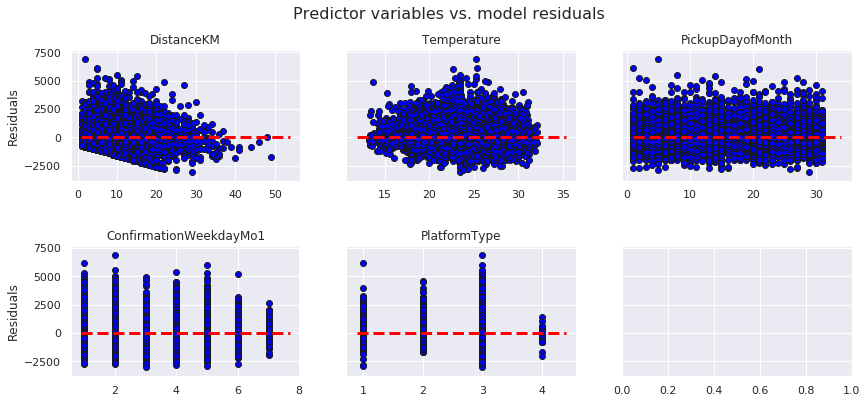

In [145]:
fig, axs = plt.subplots(2,3, figsize=(14,6),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(predictor_variables_interp):
    axs[index].set_title("{}".format(column),fontsize=12)
    axs[index].scatter(x=interpret_df[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index].grid(True)
    xmin = min(interpret_df[column])
    xmax = max(interpret_df[column])
    axs[index].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    
    # label axes on the left
    if index == 1 or index == 4:
        axs[index-1].set_ylabel('Residuals')

#### Observations Residuals vs. Predictor Variables Plots 
- `Distance - (KM)` residuals skewed to the positive side for below 25 km

- `Temperature` and `Pickup - Day of Month` residuals are approximately uniformly randomly distributed about the zero x-axes;

- `Confirmation - Weekday` Residuals skewed uniformly to the top;

- `Platform Type`:
    - Residuals for plarforms 1 - 3 are skewed to the top
    - residuals for platform 4 are evenly distributed

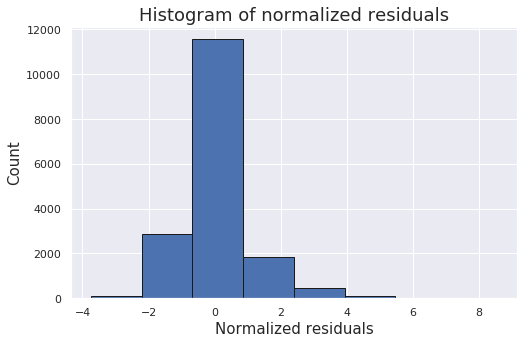

In [147]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

#### Check for Normal Distribution of Residuals

Generally residuals are normally distributed.

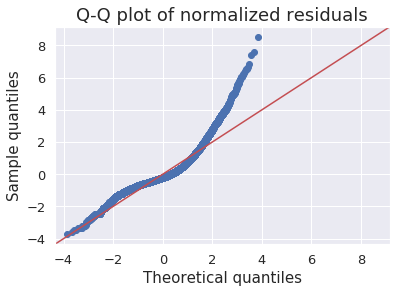

In [149]:
# plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

#### Observations Q-Q Plot
* From 2, thh residual distribution deviates from the standard normal distributions

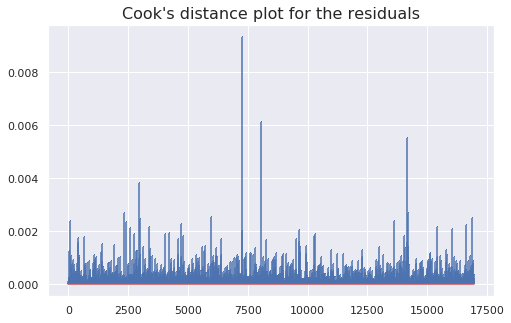

In [152]:
(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.grid(True)
plt.show()

#### Observations from Cook's distance
There are a few Sendy orders that need to be earmarked for deeper observation because they disproportionately affect the results of the data.

# 4. Conclusion

1. The model submitted was the base model and has scope for improvement
    * Feature engineering experiments with the following variables:
        * Based on plotted distribution Days of the week - Reduce to Weekdays and Weekends
    * Dummy Variable Encoding on the platform type
    * Adding the feature engineered hours parcel delivery to the model as a predictor
    * Adding one of the Rider features as a predictor
    * Tuning the model
2. Variables That may improve predictions further
    * Precipitation, if it was more complete
    * Traffic congestion information may also have added more insights
3. An interesting finding from the data is the all the different date and time related variables showed high correlation.